In [ ]:
!apt-get install git


In [ ]:
!git clone https://github.com/elayemu/Nova-Fin-Sentiment-Analysis

In [ ]:
!git config --global user.name "Elsabet Yemane Girma"
!git config --global user.email "elayemu@gmail.com"

# Setting Up Environment

In [ ]:
!pip install pandas numpy nltk matplotlib seaborn
!pip install ta-lib
!pip install pynance


# Load the Required Libraries

In [ ]:
pip install --upgrade pynance

In [ ]:
pip install yfinance


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from datetime import datetime
import yfinance as yf  
import os

# Load the Datasets

In [37]:

# Load financial news data
df = pd.read_csv('/kaggle/input/financial-news-and-stock-price-integration-dataset-1/Data/raw_analyst_ratings.csv') 

# Load stock historical data
stocks = {}
stock_symbols = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
for symbol in stock_symbols:
    stocks[symbol] = pd.read_csv(f'/kaggle/input/financial-news-and-stock-price-integration-dataset-1/Data/yfinance_data/yfinance_data/{symbol}_historical_data.csv')

# Display the first few rows of the news dataset
print(df.head())
df.head()

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Exploratory Data Analysis (EDA) ## Descriptive Statistics

Headline Length Statistics:
count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


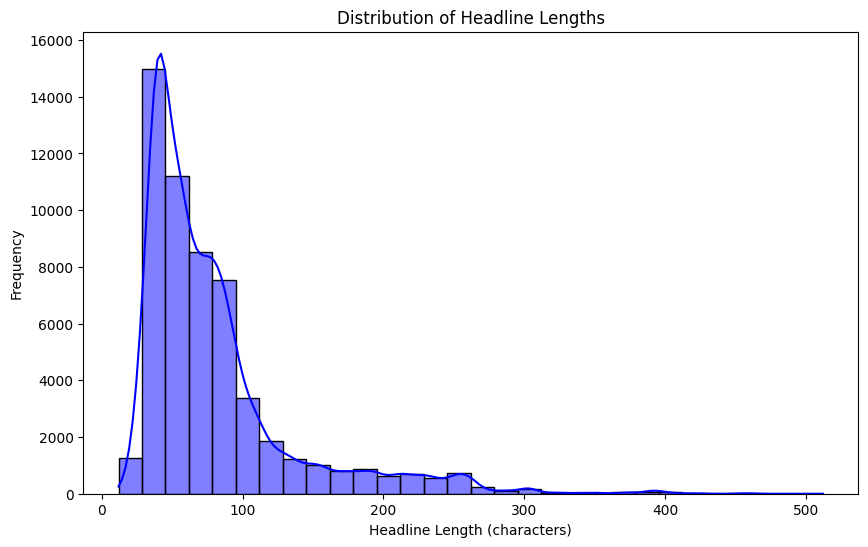

Articles per Publisher:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
John Harris              1
Alex Biles               1
Ilir Shkurti             1
Kyle Dennis              1
Usman Rafi               1
Name: count, Length: 225, dtype: int64


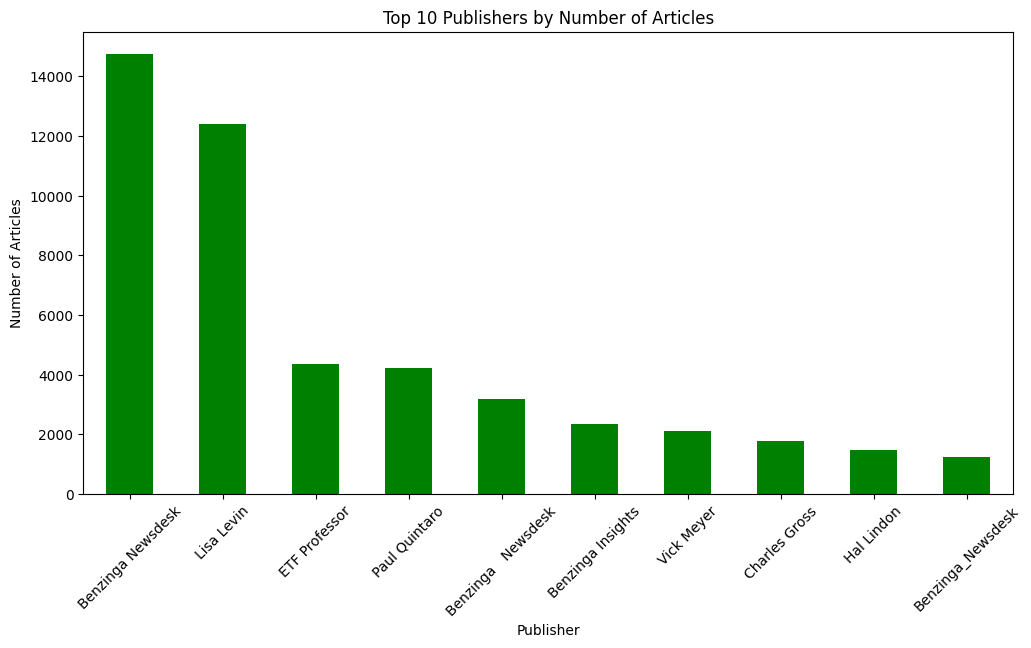

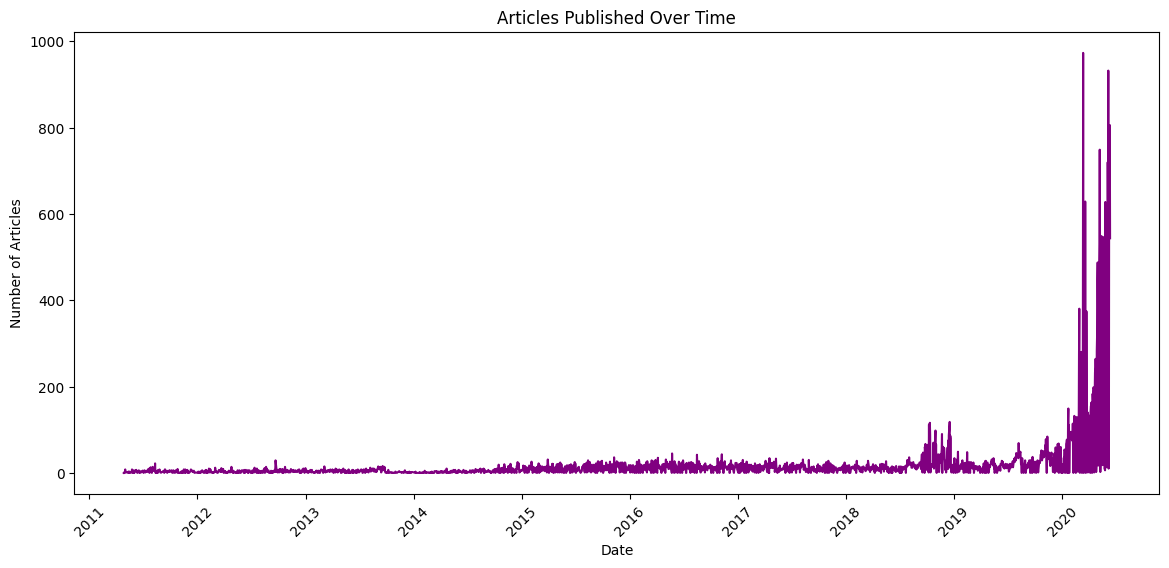

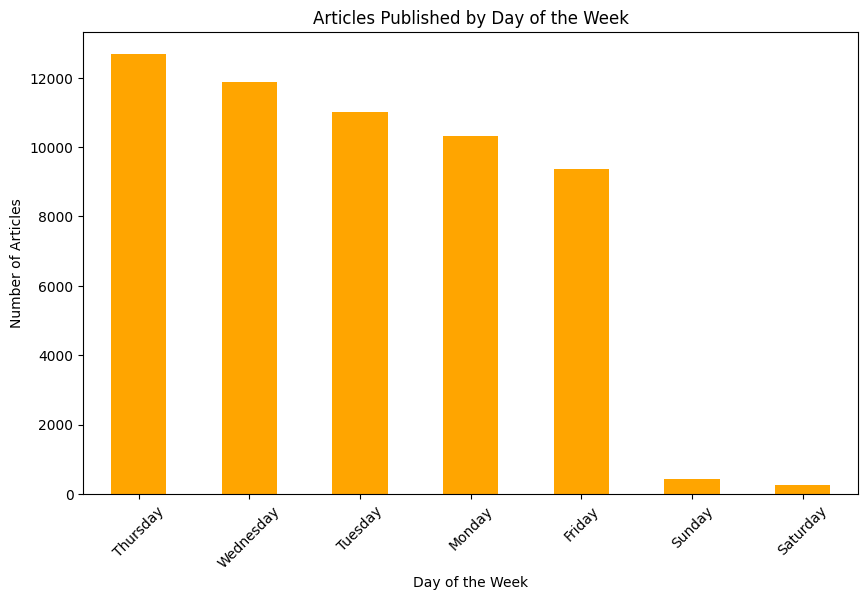

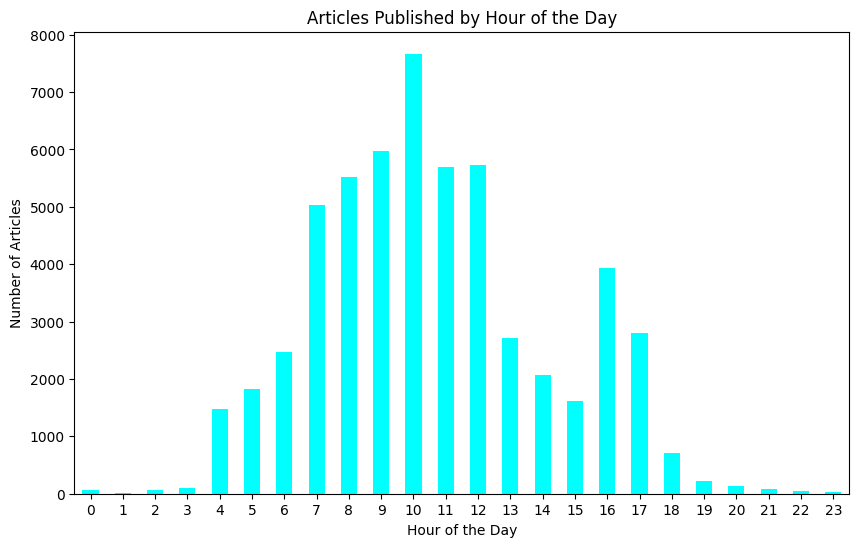

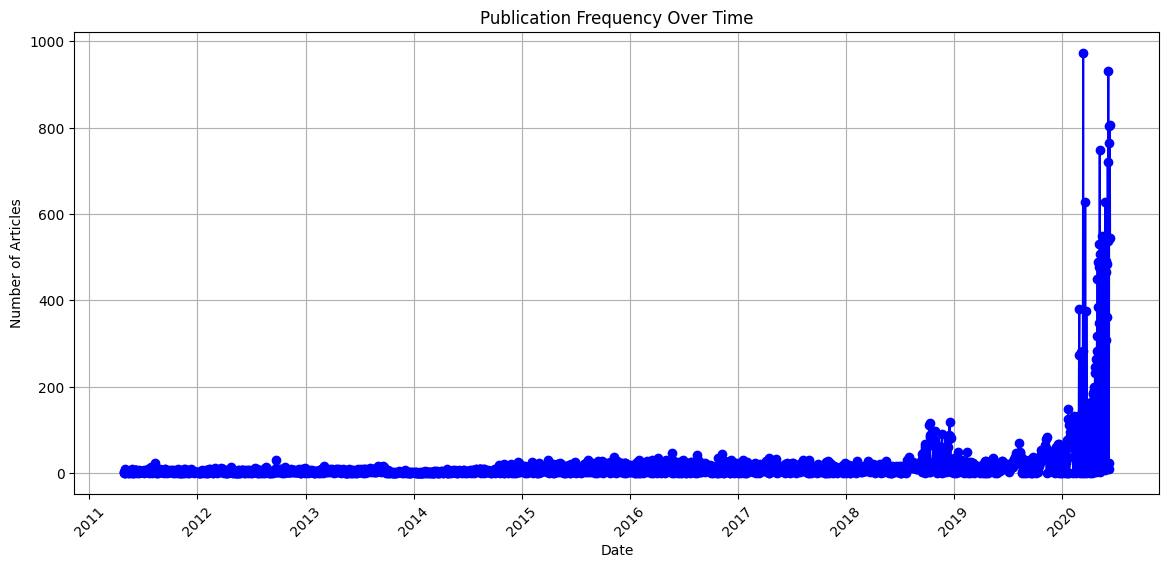

Significant Spikes in Publication Frequency:
publication_date
2020-02-27    275
2020-02-28    381
2020-03-06    281
2020-03-11    282
2020-03-12    973
2020-03-19    629
2020-03-23    375
2020-03-24    160
2020-04-09    164
2020-04-13    184
2020-04-15    186
2020-04-16    199
2020-04-17    194
2020-04-20    180
2020-04-21    233
2020-04-22    245
2020-04-23    265
2020-04-24    246
2020-04-27    283
2020-04-28    317
2020-04-29    449
2020-04-30    488
2020-05-01    385
2020-05-04    347
2020-05-05    478
2020-05-06    531
2020-05-07    749
2020-05-08    508
2020-05-11    485
2020-05-12    387
2020-05-13    549
2020-05-14    536
2020-05-15    322
2020-05-18    547
2020-05-19    332
2020-05-20    461
2020-05-21    333
2020-05-22    286
2020-05-26    628
2020-05-27    492
2020-05-28    465
2020-05-29    309
2020-06-01    484
2020-06-02    361
2020-06-03    720
2020-06-04    538
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
dtype: int64


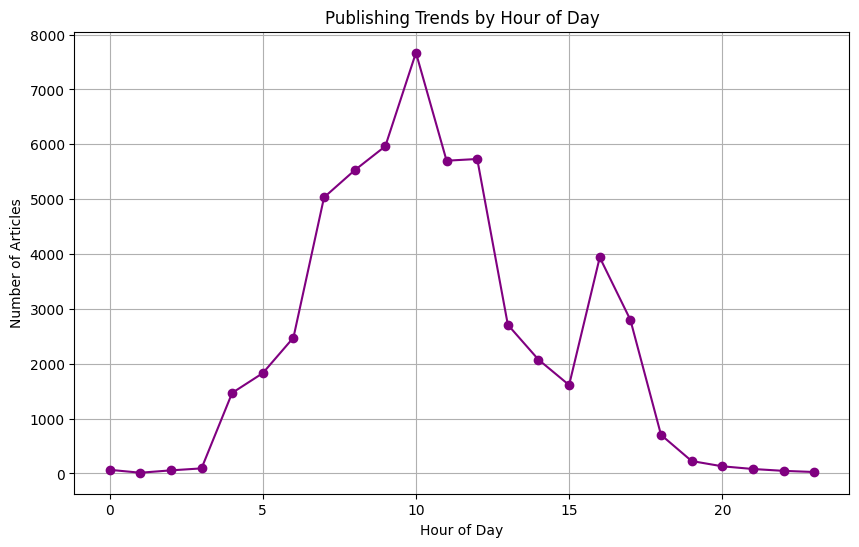

Analysis Complete. Visualizations and statistics generated.


In [36]:
# Load the dataset
df = pd.read_csv('/kaggle/input/financial-news-and-stock-price-integration-dataset-1/Data/raw_analyst_ratings.csv')

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for missing values in date column
if df['date'].isnull().any():
    print("Warning: Some dates could not be parsed and will be dropped.")
    df = df.dropna(subset=['date'])

# Calculate headline length
df['headline_length'] = df['headline'].str.len()

# Generate headline length statistics
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:")
print(headline_stats)

# Plot distribution of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Count articles per publisher
publisher_counts = df['publisher'].value_counts()
print("Articles per Publisher:")
print(publisher_counts)

# Plot top 10 publishers by number of articles
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Extract publication date
df['publication_date'] = df['date'].dt.date

# Count articles by publication date
articles_by_day = df['publication_date'].value_counts().sort_index()

# Plot articles published over time
plt.figure(figsize=(14, 6))
articles_by_day.plot(kind='line', color='purple')
plt.title('Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Count articles by day of the week
df['day_of_week'] = df['date'].dt.day_name()
day_of_week_counts = df['day_of_week'].value_counts()

# Plot articles published by day of the week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='orange')
plt.title('Articles Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Count articles by hour of the day
df['hour'] = df['date'].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()

# Plot articles published by hour of the day
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='cyan')
plt.title('Articles Published by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()

# Calculate publication frequency
publication_frequency = df.groupby(df['publication_date']).size()

# Plot publication frequency over time
plt.figure(figsize=(14, 6))
plt.plot(publication_frequency.index, publication_frequency, marker='o', color='blue')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Identify significant spikes in publication frequency
threshold = publication_frequency.mean() + 2 * publication_frequency.std()
spikes = publication_frequency[publication_frequency > threshold]
if not spikes.empty:
    print("Significant Spikes in Publication Frequency:")
    print(spikes)

# Calculate hourly distribution of articles
hourly_distribution = df.groupby('hour').size()

# Plot publishing trends by hour of the day
plt.figure(figsize=(10, 6))
hourly_distribution.plot(kind='line', marker='o', color='purple')
plt.title('Publishing Trends by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

print("Analysis Complete. Visualizations and statistics generated.")

# Quantitative Analysis

In [ ]:

def sharpe_ratio(returns, risk_free_rate=0.01):
    """Calculate the Sharpe Ratio."""
    excess_returns = returns - risk_free_rate
    return np.mean(excess_returns) / np.std(excess_returns)

def sortino_ratio(returns, risk_free_rate=0.01):
    """Calculate the Sortino Ratio."""
    excess_returns = returns - risk_free_rate
    downside_returns = excess_returns[excess_returns < 0]
    downside_deviation = np.std(downside_returns)
    return np.mean(excess_returns) / downside_deviation if downside_deviation != 0 else np.nan

# Define the folder containing the CSV files
data_folder = '../input/yfinance-data'  # Update path as needed

all_data = []

# Read all CSV files from the specified folder
for file in os.listdir(data_folder):
    if file.endswith('.csv'):
        filepath = os.path.join(data_folder, file)
        df = pd.read_csv(filepath, parse_dates=['Date'])
        df['Stock'] = file.split('.')[0]  
        all_data.append(df)

# Combine all data into a single DataFrame
df = pd.concat(all_data, ignore_index=True)
df.sort_values(['Stock', 'Date'], inplace=True)

# Select a specific stock for analysis
selected_stock = df[df['Stock'] == df['Stock'].unique()[0]].copy()

# Set Date as the index
selected_stock.set_index('Date', inplace=True)

# Check for required columns
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
if not all(col in selected_stock.columns for col in required_columns):
    raise ValueError(f"The dataset must contain the following columns: {required_columns}")

# Calculate technical indicators
selected_stock['SMA_50'] = talib.SMA(selected_stock['Close'], timeperiod=50)
selected_stock['SMA_200'] = talib.SMA(selected_stock['Close'], timeperiod=200)
selected_stock['RSI'] = talib.RSI(selected_stock['Close'], timeperiod=14)
selected_stock['MACD'], selected_stock['MACD_Signal'], _ = talib.MACD(
    selected_stock['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Calculate returns and performance metrics
returns = selected_stock['Close'].pct_change().dropna()
sharpe_ratio_value = sharpe_ratio(returns, risk_free_rate=0.01)
sortino_ratio_value = sortino_ratio(returns, risk_free_rate=0.01)

# Print performance metrics
print(f"Sharpe Ratio: {sharpe_ratio_value:.2f}")
print(f"Sortino Ratio: {sortino_ratio_value:.2f}")

# Plot the results
plt.figure(figsize=(12, 8))

# Closing price and moving averages
plt.subplot(3, 1, 1)
plt.plot(selected_stock['Close'], label='Close Price', color='blue')
plt.plot(selected_stock['SMA_50'], label='50-day SMA', color='orange')
plt.plot(selected_stock['SMA_200'], label='200-day SMA', color='green')
plt.title(f"Stock Price and Moving Averages ({selected_stock['Stock'].iloc[0]})")
plt.legend()

# RSI plot
plt.subplot(3, 1, 2)
plt.plot(selected_stock['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', alpha=0.7)
plt.axhline(30, linestyle='--', color='green', alpha=0.7)
plt.title("Relative Strength Index (RSI)")
plt.legend()

# MACD plot
plt.subplot(3, 1, 3)
plt.plot(selected_stock['MACD'], label='MACD', color='red')
plt.plot(selected_stock['MACD_Signal'], label='Signal Line', color='black')
plt.title("MACD and Signal Line")
plt.legend()

plt.tight_layout()
plt.show()

## Sentiment Analysis

In [19]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
news_data['sentiment'] = news_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment
def classify_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

news_data['sentiment_label'] = news_data['sentiment'].apply(classify_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Distribution:
sentiment
Neutral     934914
Positive    341178
Negative    131236
Name: count, dtype: int64


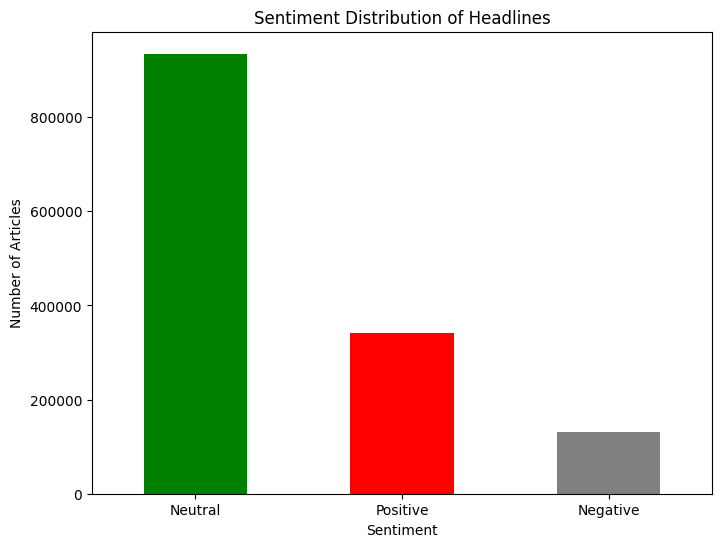

Top Keywords:
        keyword  frequency
64123        vs     162099
57527    stocks     161776
25634       est     140604
25337       eps     128897
39485    market     120558
54747    shares     114313
51336   reports     108710
62634    update      91723
23882  earnings      87399
53205     sales      79645


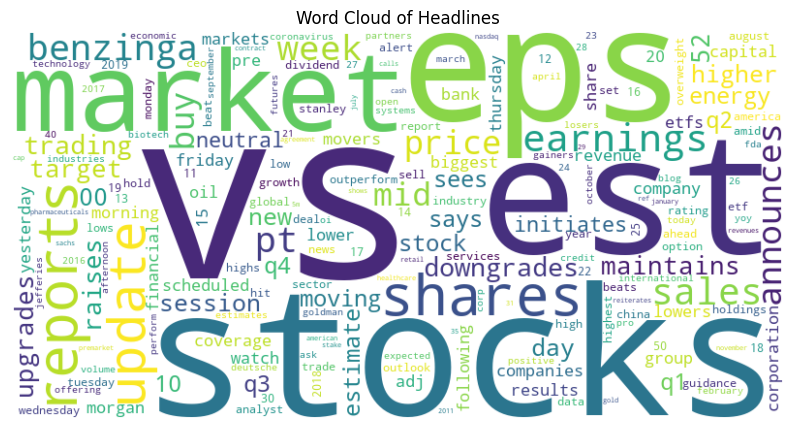

In [32]:
# Import necessary libraries
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset 
df = pd.read_csv('/kaggle/input/financial-news-and-stock-price-integration-dataset-1/Data/raw_analyst_ratings.csv')

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Analyze sentiment of the headlines
df['sentiment'] = df['headline'].apply(analyze_sentiment)

# Count the sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()

# CountVectorizer for text feature extraction
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
word_count_matrix = vectorizer.fit_transform(df['headline'])

# Get keywords and their frequency
keywords = vectorizer.get_feature_names_out()
word_freq = word_count_matrix.sum(axis=0).A1
keyword_freq = pd.DataFrame({'keyword': keywords, 'frequency': word_freq})
keyword_freq = keyword_freq.sort_values(by='frequency', ascending=False)

print("Top Keywords:")
print(keyword_freq.head(10))

# Creating a word cloud from the keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(keyword_freq['keyword'], keyword_freq['frequency']))
)

# Displaying the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()

In [ ]:

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from concurrent.futures import ThreadPoolExecutor


nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def compute_sentiment_and_classify(headline):
    # Compute sentiment score
    score = sia.polarity_scores(headline)['compound']
    
    # Classify sentiment
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

def process_headlines(headlines):
    with ThreadPoolExecutor() as executor:
        sentiment_labels = list(executor.map(compute_sentiment_and_classify, headlines))
    return sentiment_labels

news_data['sentiment_label'] = process_headlines(news_data['headline'])

# Store the sentiment score
news_data['sentiment'] = news_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

## Time Series Analysis


Publication Frequency Over Time:
publication_date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-05-30     14
2020-05-31     17
2020-06-01    205
2020-06-02    183
2020-06-03     69
Length: 3946, dtype: int64


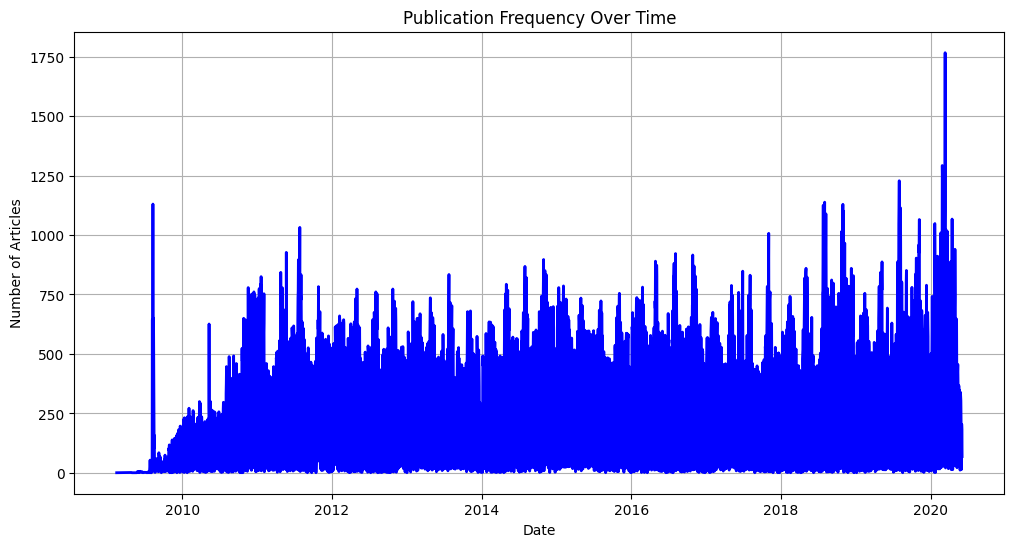

Significant Spikes in Publication Frequency:
publication_date
2009-08-10    1130
2011-05-23     927
2011-07-21     896
2011-07-28    1032
2014-10-30     897
              ... 
2020-03-23    1015
2020-04-01     873
2020-04-07     887
2020-04-15    1067
2020-04-29     940
Length: 70, dtype: int64


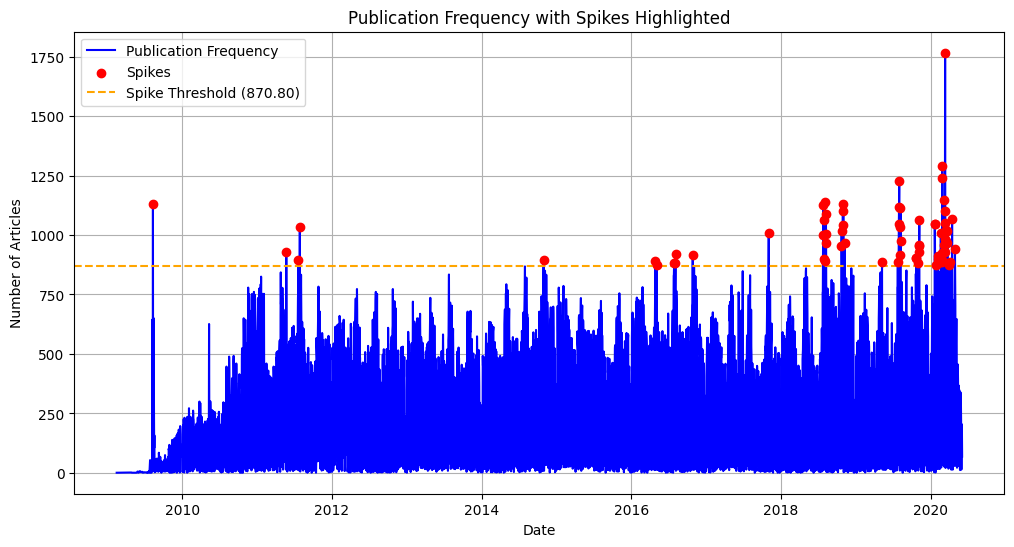

Publishing Frequency by Hour:
hour
0    1351341
dtype: int64


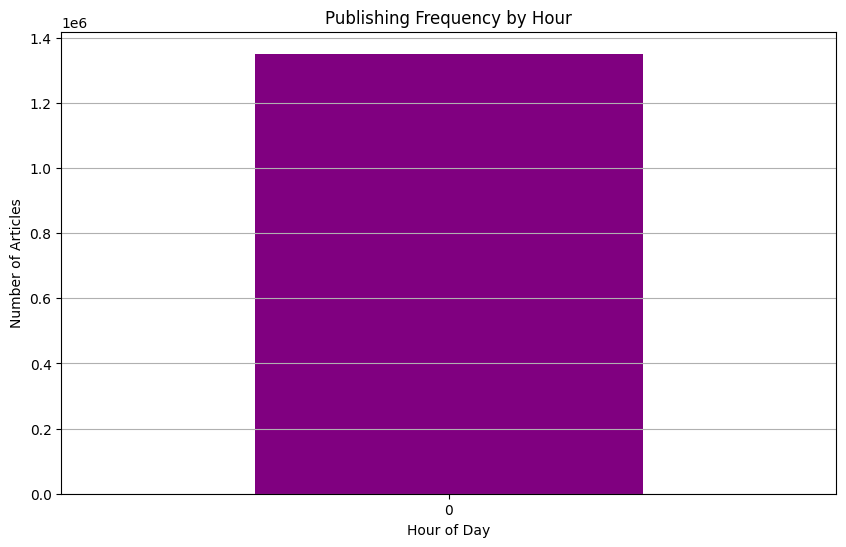

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/financial-news-and-stock-price-integration-dataset-1/Data/raw_analyst_ratings.csv')

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Drop rows where 'date' is NaT
df.dropna(subset=['date'], inplace=True)

# Extract publication date
df['publication_date'] = df['date'].dt.date

# Group by publication date and count occurrences
publication_trends = df.groupby('publication_date').size()
print("Publication Frequency Over Time:")
print(publication_trends)

# Plot publication trends
plt.figure(figsize=(12, 6))
publication_trends.plot(kind='line', color='blue', linewidth=2)
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# Calculate mean and standard deviation for spike detection
mean_publications = publication_trends.mean()
std_publications = publication_trends.std()
spike_threshold = mean_publications + 2 * std_publications

# Identify significant spikes
spikes = publication_trends[publication_trends > spike_threshold]
print("Significant Spikes in Publication Frequency:")
print(spikes)

# Plot publication trends with spikes highlighted
plt.figure(figsize=(12, 6))
plt.plot(publication_trends.index, publication_trends, label='Publication Frequency', color='blue')
plt.scatter(spikes.index, spikes, color='red', label='Spikes', zorder=5)
plt.axhline(spike_threshold, color='orange', linestyle='--', label=f'Spike Threshold ({spike_threshold:.2f})')
plt.title('Publication Frequency with Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()

# Analyze publishing frequency by hour
df['hour'] = df['date'].dt.hour
hourly_distribution = df.groupby('hour').size()
print("Publishing Frequency by Hour:")
print(hourly_distribution)

# Plot hourly publishing distribution
plt.figure(figsize=(10, 6))
hourly_distribution.plot(kind='bar', color='purple')
plt.title('Publishing Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Correlation Analysis
## Calculate correlation between the sentiment scores and stock price movements:

# Quantitative Analysis Using TA-Lib
## Calculate Technical Indicators

In [21]:
# Display the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# List all files in the current directory
files = os.listdir(current_directory)
print("Files in the current directory:")
for file in files:
    print(file)

Current Directory: /kaggle/working
Files in the current directory:
Nova-Fin-Sentiment-Analysis
.virtual_documents
